In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten
from keras.utils import np_utils
import scipy
from keras.layers import Dense
from snorkel.labeling import labeling_function
import pandas as pd
import glob
import os
import subprocess
from collections import OrderedDict
import torch
import torch.nn as nn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from snorkel.classification.data import DictDataset, DictDataLoader
np.random.seed(5)
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
dataset = loadtxt('.\\data\\maked_data_200.csv', delimiter=',')
# split into input (X) and output (y) variables

In [3]:
dataset[:,130]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [4]:
X = dataset[:,0:129]
y = dataset[:,130]

In [5]:
model = Sequential()
model.add(Dense(129, input_dim=129, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
40/40 [==============================] - 0s 625us/step - loss: 88.2744 - accuracy: 0.6650
Epoch 2/150
40/40 [==============================] - 0s 600us/step - loss: 19.2233 - accuracy: 0.8300
Epoch 3/150
40/40 [==============================] - 0s 600us/step - loss: 10.6608 - accuracy: 0.8900
Epoch 4/150
40/40 [==============================] - 0s 575us/step - loss: 10.9170 - accuracy: 0.8900
Epoch 5/150
40/40 [==============================] - 0s 600us/step - loss: 9.6292 - accuracy: 0.8925
Epoch 6/150
40/40 [==============================] - 0s 600us/step - loss: 4.6037 - accuracy: 0.9550
Epoch 7/150
40/40 [==============================] - 0s 575us/step - loss: 2.8872 - accuracy: 0.9650
Epoch 8/150
40/40 [==============================] - 0s 600us/step - loss: 2.3766 - accuracy: 0.9500
Epoch 9/150
40/40 [==============================] - 0s 600us/step - loss: 6.2601 - accuracy: 0.9325
Epoch 10/150
40/40 [==============================] - 0s 600us/step - loss: 3.0111 - ac

In [6]:
dataset2 = loadtxt('D:\\project\\snorkel\\data\\processed_data_test.csv', delimiter=',')

In [7]:
testX = dataset2[:,0:129]
testY = dataset2[:,130]

In [8]:
testY

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.975


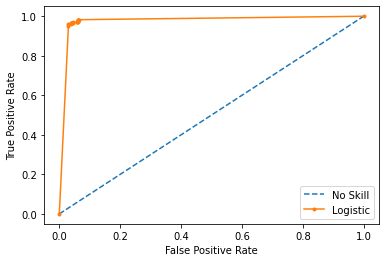

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(testY))]
# fit a model
lr_probs = model.predict(testX)
# keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 0]
# calculate scores
ns_auc = roc_auc_score(testY, ns_probs)
lr_auc = roc_auc_score(testY, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testY, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [10]:
result

NameError: name 'result' is not defined

In [11]:
idx  = 0
len(result)
equal_cnt = 0
tp_cnt = 0
tn_cnt = 0
fp_cnt = 0
fn_cnt = 0
for r in result :

    a = r[0]
    b = int(testY[idx])
    #print("r : ", r[0], "a :", a,"b :",b)
    if r[0] >= 0.99 :
        a = 1
    else :
        a = 0
        
    if testY[idx] >= 1 :
        b = 1
    else :
        b = 0
    if a == b :
        equal_cnt += 1
    if a == 1 and b == 1 :
        tp_cnt += 1
    if a == 0 and b == 0 :
        tn_cnt += 1        
    if a == 0 and b == 1 :
        fp_cnt += 1                  
    if a == 1 and b == 0 :
        fn_cnt += 1          
    idx += 1
#print("tp : ",tp_cnt,",tn : ",tn_cnt,",fp : ",fp_cnt,",fn : ",fn_cnt)
precision = tp_cnt / (tp_cnt + fp_cnt)
recall = tp_cnt / (tp_cnt + fn_cnt)
accuracy = (tp_cnt + tn_cnt) / (tp_cnt + fn_cnt + fp_cnt + tn_cnt)
f1_score = 2 * ((precision * recall)/ (precision + recall))
print("tp : ",tp_cnt,",tn : ",tn_cnt,",fp : ",fp_cnt,",fn : ",fn_cnt,",precision : ",precision,",recall : ",recall ,",acc : ", accuracy,",f1_score : ", f1_score)
    
    

tp :  383 ,tn :  396 ,fp :  17 ,fn :  4 ,precision :  0.9575 ,recall :  0.9896640826873385 ,acc :  0.97375 ,f1_score :  0.9733163913595934
